In [1]:
import numpy as np
from time import sleep
import random
from environment import Environment
import matplotlib.pyplot as plt

pygame 2.0.2 (SDL 2.0.16, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
env = Environment()
q_table = np.random.uniform(low=-1, high=1, size=([len(env.rewards)] * 2 + [4]))

lr = 0.1
gamma = 0.95
epsilon = 0.2

In [3]:
all_epochs = []
for i in range(1, 1500):
	state = env.reset()

	

	epochs, reward = 0,0
	action = -1
	done  = False
	while not done:
		if(random.uniform(0, 1) < epsilon):
			action = env.random_action()
		else:
			action = np.argmax(q_table[state])
		
		next_state, reward, done = env.step(action)
		
		old_value = q_table[state + (action, )]
		next_max = np.max(q_table[next_state])
		new_value = (1-lr)*old_value + lr * (reward + gamma * next_max )

		q_table[state + (action, )] = new_value
		state = next_state
		epochs +=1

	all_epochs.append(epochs)


5.267693487300359


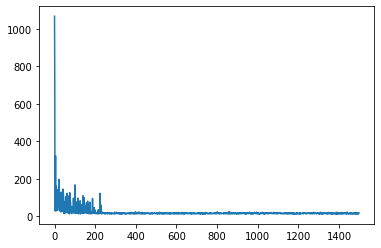

In [4]:
print(np.max(q_table))
plt.plot(all_epochs)

In [5]:
# Evaluation
env.render_train()
env.render(q_table)